In [3]:
# Import everything from Qiskit
from qiskit import *

In [4]:
# Create a 2 qubit quantum register
qr = QuantumRegister(2)

In [7]:
# Create a 2 bit classical register to take measurements of these 2 qubits
cr = ClassicalRegister(2)

In [8]:
# Build a quantum circuit using (containing) those two registers
circuit = QuantumCircuit(qr, cr)

In [9]:
# Import tools to draw the circuit
%matplotlib inline

In [10]:
# Draw the circuit
circuit.draw()

q1_0: 
      
q1_1: 
      
c2_0: 
      
c2_1:

In [11]:
# Create entanglement circuit
# Apply a Hadamard gate (h) to the first , 0, qubit
circuit.h(qr[0])

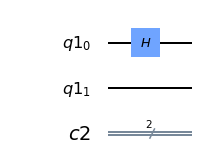

In [12]:
# Draw the circuit
circuit.draw(output='mpl')

In [13]:
# Apply a CNOT gate (cx). The first qubit is the control and the second is the target. 
# This is determind: cx (control, target)
circuit.cx(qr[0], qr[1])

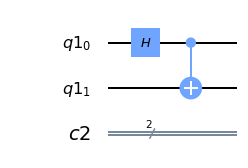

In [14]:
#Draw the circuit
circuit.draw(output='mpl')

In [15]:
# Measure the qubits and store the measurements in the classical bits of the classical register
circuit.measure(qr, cr)

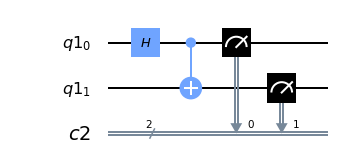

In [16]:
#Draw the circuit
circuit.draw(output='mpl')

In [17]:
# Simulate the circuit on Qiskit. We use Aer for simulations on our local computer and the simulator is qasm_simulator
# qasm means quantum assembly language
simulator = Aer.get_backend('qasm_simulator')


In [18]:
# Execute the circuit using the simulator as backend
execute(circuit, backend = simulator)

In [19]:
# After the execution store the results
result = execute(circuit, backend = simulator).result()


In [20]:
# To see the results import visualization tools from qiskit
from qiskit.tools.visualization import plot_histogram

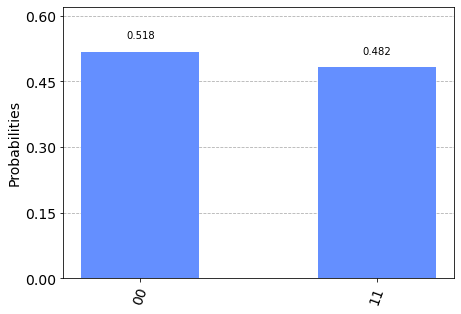

In [21]:
# Plot the results as histogram
plot_histogram(result.get_counts(circuit))

In [23]:
# The results are not 0.5 because we run a limmited number of shots on the simulator instead an infinite number

In [24]:
# The circuit is ok, so we will run it on an real quantum device

In [25]:
# Load the IBM account to allows access to the quantum computer
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [27]:
# Choose the provider, i.e. IBM-Q
provider = IBMQ.get_provider('ibm-q')

In [28]:
# Choose the quantum computer i.e. the device on which to execute the circuit. Here no. 16 located in Melbourne
qcomp = provider.get_backend('ibmq_16_melbourne')

In [29]:
# What job the quantum computer will do. Execute the circuit on the chosen backend
job = execute(circuit, backend=qcomp)

In [30]:
# There is a que for the quantum computer so we will monitor the que and the execution. We import the monitor
from qiskit.tools.monitor import job_monitor

In [31]:
# Monitor job status
job_monitor(job)

Job Status: job has successfully run


In [32]:
# Gives the decenting number of jobs in the que

In [33]:
result = job.result()

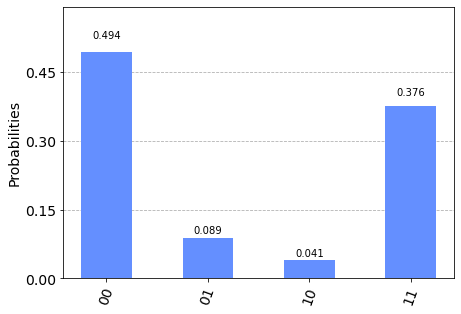

In [34]:
# Plot the result in histogram
plot_histogram(result.get_counts(circuit))

In [35]:
# Simulator assumes an almost perfect quantum computer
# Real quantum computers run with errors